In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
# Define custom function to make charts
# Adapted from Chris Albon's example at https://chrisalbon.com/python/matplotlib_stacked_bar_plot.html

def barchart(df, label, plot_title):
    f, ax1 = plt.subplots(1, figsize=(10,5))
    bar_width = 0.75
    bar_left = [i+1 for i in range(len(df))]
    tick_pos = [i+(bar_width/2) for i in bar_left] 

    ax1.bar(bar_left,
            df['Felony'],
            width=bar_width,
            label='Felony',
            alpha=0.5,
            color='#F4561D')

    ax1.bar(bar_left,
            df['Misdemeanor'],
            width=bar_width,
            bottom=df['Felony'],
            label='Misdemeanor',
            alpha=0.5,
            color='#F1911E')

    ax1.bar(bar_left,
            df['Violation'],
            width=bar_width,
            bottom=[i+j for i,j in zip(df['Felony'],df['Misdemeanor'])],
            label='Violation',
            alpha=0.5,
            color='#F1BD1A')

    plt.xticks(tick_pos, df[label], rotation=90)
    plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
    plt.legend(bbox_to_anchor=(1,1.02), loc='upper left')
    plt.title(plot_title)
    plt.show()
    
def linechart(df, label, plot_title):
    f, ax1 = plt.subplots(1, figsize=(10,5))
    tick_pos = [i+1 for i in range(len(df))]

    ax1.plot(tick_pos,
            df['Felony'],
            linewidth=3,
            label='Felony',
            alpha=0.7,
            color='#F4561D')

    ax1.plot(tick_pos,
            df['Misdemeanor'],
            linewidth=3,
            label='Misdemeanor',
            alpha=0.7,
            color='#F1911E')

    ax1.plot(tick_pos,
            df['Violation'],
            linewidth=3,
            label='Violation',
            alpha=0.7,
            color='#F1BD1A')

    plt.xticks(tick_pos, df[label], rotation=90)
    plt.legend(bbox_to_anchor=(1,1.02), loc='upper left')
    plt.title(plot_title)
    plt.show()

## Counts by year

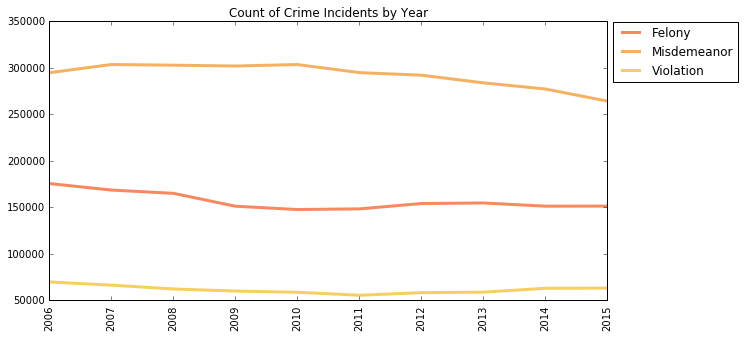

In [3]:
fpath = '../{}/output/{}_count_by_year.out'

by_year = pd.DataFrame(columns=['Year', 'Felony', 'Violation', 'Misdemeanor'])

# Felonies
felonies = pd.read_csv(fpath.format('felonies', 'felony'), names=['Year', 'Count'])
felonies['Year'] = felonies['Year'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
felonies.ix[felonies['Year']=='','Year'] = 'MISSING YEAR'
felonies['Count'] = felonies['Count'].apply(lambda x: x.rstrip(')'))
felonies['Count'] = felonies['Count'].astype(int)
by_year['Year'] = felonies['Year']
by_year['Felony'] = felonies['Count']

# Misdemeanors
misdemeanors = pd.read_csv(fpath.format('misdemeanors', 'misdemeanor'), names=['Year', 'Count'])
misdemeanors['Year'] = misdemeanors['Year'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
misdemeanors.ix[misdemeanors['Year']=='','Year'] = 'MISSING YEAR'
misdemeanors['Count'] = misdemeanors['Count'].apply(lambda x: x.rstrip(')'))
misdemeanors['Count'] = misdemeanors['Count'].astype(int)
by_year['Misdemeanor'] = misdemeanors['Count']

# Violations
viols = pd.read_csv(fpath.format('violations', 'violation'), names=['Year', 'Count'])
viols['Year'] = viols['Year'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
viols.ix[viols['Year']=='','Year'] = 'MISSING YEAR'
viols['Count'] = viols['Count'].apply(lambda x: x.rstrip(')'))
viols['Count'] = viols['Count'].astype(int)
by_year['Violation'] = viols['Count']

# # Display the counts, including missing borough
# display(by_year)

# Now remove missing borough for purposes of plotting
by_year = by_year[by_year['Year']!='MISSING YEAR']

# Plot
linechart(by_year, 'Year', 'Count of Crime Incidents by Year')

## Counts by borough

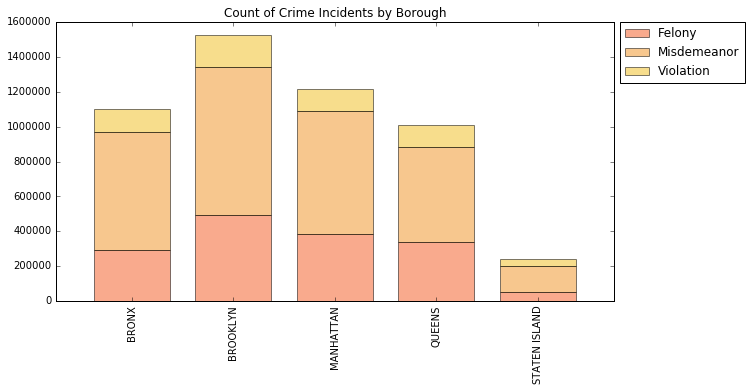

In [4]:
fpath = '../{}/output/{}_count_by_borough.out'

by_borough = pd.DataFrame(columns=['Borough', 'Felony', 'Violation', 'Misdemeanor'])

# Felonies
felonies = pd.read_csv(fpath.format('felonies', 'felony'), names=['Borough', 'Count'])
felonies['Borough'] = felonies['Borough'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
felonies.ix[felonies['Borough']=='','Borough'] = 'MISSING BOROUGH'
felonies['Count'] = felonies['Count'].apply(lambda x: x.rstrip(')'))
felonies['Count'] = felonies['Count'].astype(int)
by_borough['Borough'] = felonies['Borough']
by_borough['Felony'] = felonies['Count']

# Misdemeanors
misdemeanors = pd.read_csv(fpath.format('misdemeanors', 'misdemeanor'), names=['Borough', 'Count'])
misdemeanors['Borough'] = misdemeanors['Borough'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
misdemeanors.ix[misdemeanors['Borough']=='','Borough'] = 'MISSING BOROUGH'
misdemeanors['Count'] = misdemeanors['Count'].apply(lambda x: x.rstrip(')'))
misdemeanors['Count'] = misdemeanors['Count'].astype(int)
by_borough['Misdemeanor'] = misdemeanors['Count']

# Violations
viols = pd.read_csv(fpath.format('violations', 'violation'), names=['Borough', 'Count'])
viols['Borough'] = viols['Borough'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
viols.ix[viols['Borough']=='','Borough'] = 'MISSING BOROUGH'
viols['Count'] = viols['Count'].apply(lambda x: x.rstrip(')'))
viols['Count'] = viols['Count'].astype(int)
by_borough['Violation'] = viols['Count']

# # Display the counts, including missing borough
# display(by_borough)

# Now remove missing borough for purposes of plotting
by_borough = by_borough[by_borough['Borough']!='MISSING BOROUGH']

# Plot
barchart(by_borough, 'Borough', 'Count of Crime Incidents by Borough')

## Counts by borough and year

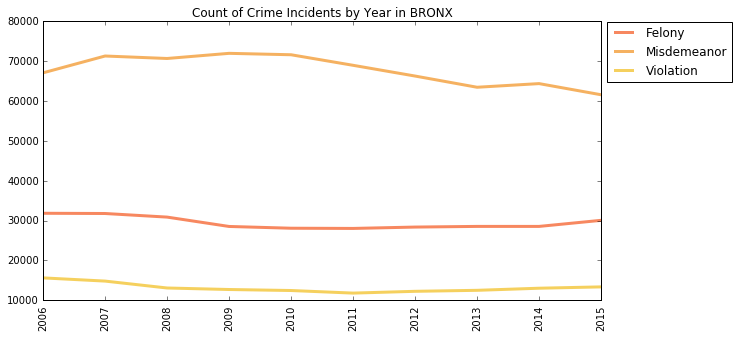

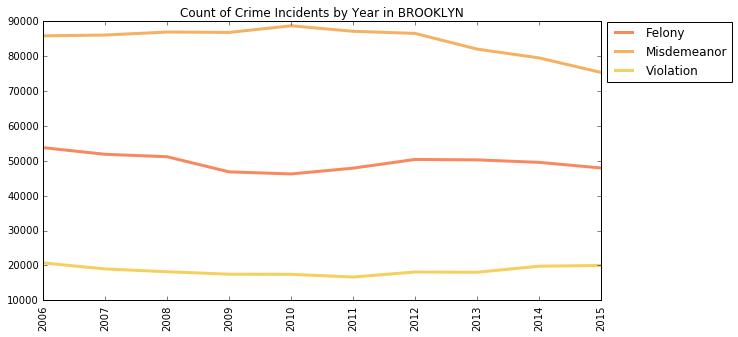

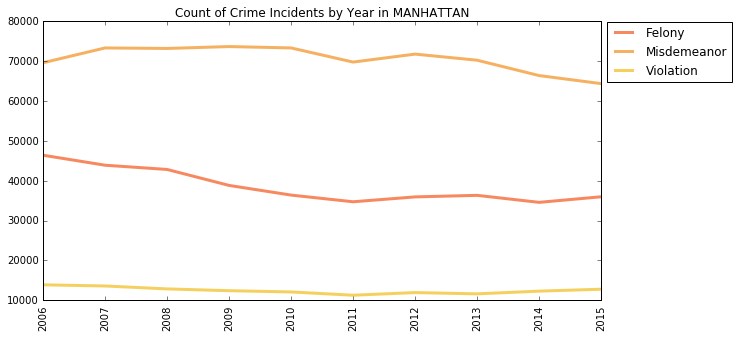

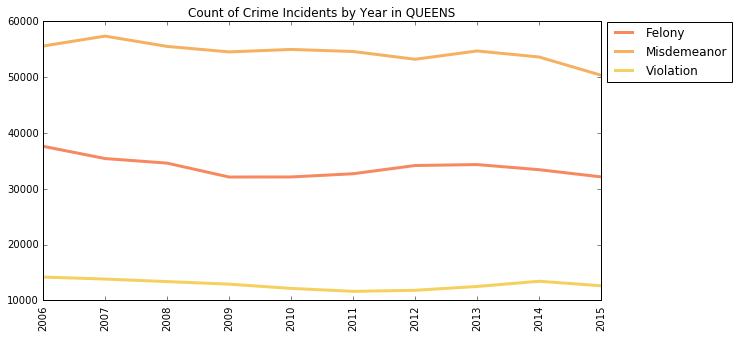

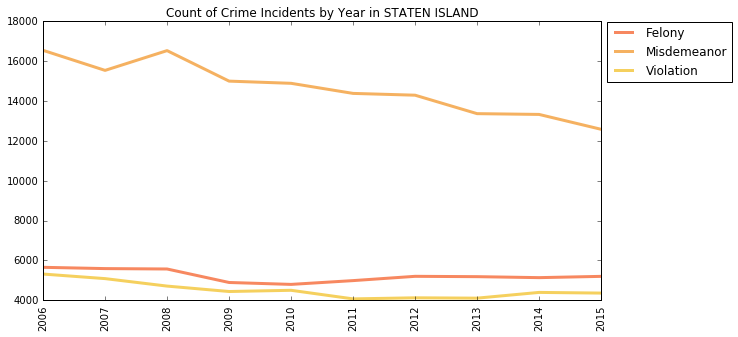

In [5]:
fpath = '../{}/output/{}_count_by_borough_year.out'

by_borough_year = pd.DataFrame(columns=['Borough', 'Year', 'Felony', 'Violation', 'Misdemeanor'])

# Felonies
felonies = pd.read_csv(fpath.format('felonies', 'felony'), names=['Borough', 'Count'])
labels = felonies['Borough'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
felonies['Borough'] = labels.apply(lambda x: x.split('_')[0])
felonies['Year'] = labels.apply(lambda x: x.split('_')[1])
felonies.ix[felonies['Borough']=='','Borough'] = 'MISSING BOROUGH'
felonies['Count'] = felonies['Count'].apply(lambda x: x.rstrip(')'))
felonies['Count'] = felonies['Count'].astype(int)
by_borough_year['Borough'] = felonies['Borough']
by_borough_year['Year'] = felonies['Year']
by_borough_year['Felony'] = felonies['Count']

# Misdemeanors
misdemeanors = pd.read_csv(fpath.format('misdemeanors', 'misdemeanor'), names=['Borough', 'Count'])
labels = misdemeanors['Borough'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
misdemeanors['Borough'] = labels.apply(lambda x: x.split('_')[0])
misdemeanors['Year'] = labels.apply(lambda x: x.split('_')[1])
misdemeanors.ix[misdemeanors['Borough']=='','Borough'] = 'MISSING BOROUGH'
misdemeanors['Count'] = misdemeanors['Count'].apply(lambda x: x.rstrip(')'))
misdemeanors['Count'] = misdemeanors['Count'].astype(int)
by_borough_year['Misdemeanor'] = misdemeanors['Count']

# Violations
viols = pd.read_csv(fpath.format('violations', 'violation'), names=['Borough', 'Count'])
labels = viols['Borough'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
viols['Borough'] = labels.apply(lambda x: x.split('_')[0])
viols['Year'] = labels.apply(lambda x: x.split('_')[1])
viols.ix[viols['Borough']=='','Borough'] = 'MISSING BOROUGH'
viols['Count'] = viols['Count'].apply(lambda x: x.rstrip(')'))
viols['Count'] = viols['Count'].astype(int)
by_borough_year['Violation'] = viols['Count']

# # Display the counts, including missing borough
# display(by_borough_year)

# Now remove missing borough for purposes of plotting
by_borough_year = by_borough_year[by_borough_year['Borough']!='MISSING BOROUGH']

# Plot for each borough
for boro in by_borough_year['Borough'].unique():
    linechart(by_borough_year[by_borough_year['Borough']==boro], 'Year', 'Count of Crime Incidents by Year in {}'.format(boro))

## Counts by season

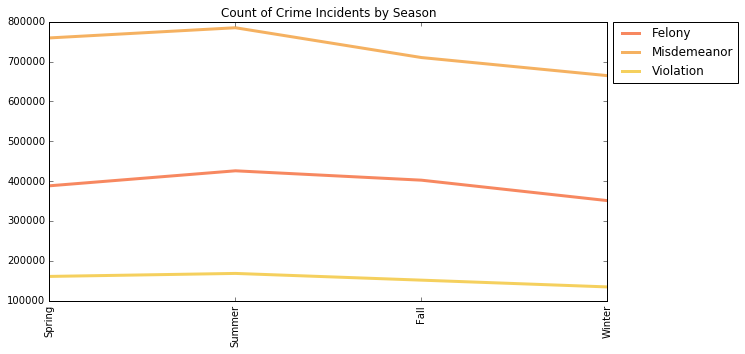

In [6]:
fpath = '../{}/output/{}_count_by_season.out'

by_season = pd.DataFrame(columns=['Season', 'Felony', 'Violation', 'Misdemeanor'])

# Felonies
felonies = pd.read_csv(fpath.format('felonies', 'felony'), names=['Season', 'Count'])
felonies['Season'] = felonies['Season'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
felonies.ix[felonies['Season']=='','Season'] = 'MISSING SEASON'
felonies['Count'] = felonies['Count'].apply(lambda x: x.rstrip(')'))
felonies['Count'] = felonies['Count'].astype(int)
by_season['Season'] = felonies['Season']
by_season['Felony'] = felonies['Count']

# Misdemeanors
misdemeanors = pd.read_csv(fpath.format('misdemeanors', 'misdemeanor'), names=['Season', 'Count'])
misdemeanors['Season'] = misdemeanors['Season'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
misdemeanors.ix[misdemeanors['Season']=='','Season'] = 'MISSING SEASON'
misdemeanors['Count'] = misdemeanors['Count'].apply(lambda x: x.rstrip(')'))
misdemeanors['Count'] = misdemeanors['Count'].astype(int)
by_season['Misdemeanor'] = misdemeanors['Count']

# Violations
viols = pd.read_csv(fpath.format('violations', 'violation'), names=['Season', 'Count'])
viols['Season'] = viols['Season'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
viols.ix[viols['Season']=='','Season'] = 'MISSING SEASON'
viols['Count'] = viols['Count'].apply(lambda x: x.rstrip(')'))
viols['Count'] = viols['Count'].astype(int)
by_season['Violation'] = viols['Count']

# # Display the counts, including missing season
# display(by_season)

# Now remove missing season for purposes of plotting
by_season = by_season[by_season['Season']!='MISSING SEASON']

# Change order of seasons
by_season = by_season.reindex([1,2,0,3])

# Capitalize season
by_season['Season'] = ['Spring', 'Summer', 'Fall', 'Winter']

# Plot
linechart(by_season, 'Season', 'Count of Crime Incidents by Season')

## Count by hour in day

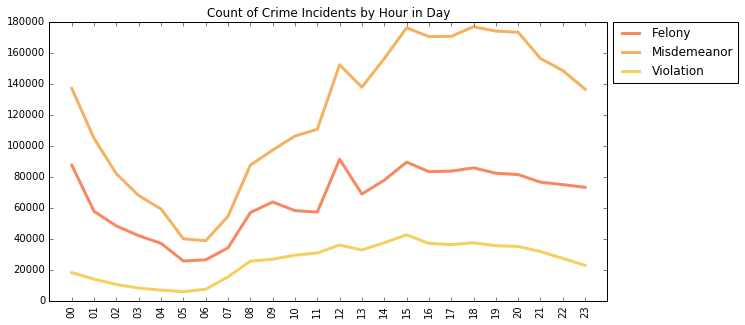

In [17]:
fpath = '../{}/output/{}_count_by_hour.out'

by_hour = pd.DataFrame(columns=['Hour', 'Felony', 'Violation', 'Misdemeanor'])

# Felonies
felonies = pd.read_csv(fpath.format('felonies', 'felony'), names=['Hour', 'Count'])
felonies['Hour'] = felonies['Hour'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
felonies.ix[felonies['Hour']=='','Hour'] = 'MISSING HOUR'
felonies['Count'] = felonies['Count'].apply(lambda x: x.rstrip(')'))
felonies['Count'] = felonies['Count'].astype(int)
by_hour['Hour'] = felonies['Hour']
by_hour['Felony'] = felonies['Count']

# Misdemeanors
misdemeanors = pd.read_csv(fpath.format('misdemeanors', 'misdemeanor'), names=['Hour', 'Count'])
misdemeanors['Hour'] = misdemeanors['Hour'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
misdemeanors.ix[misdemeanors['Hour']=='','Hour'] = 'MISSING HOUR'
misdemeanors['Count'] = misdemeanors['Count'].apply(lambda x: x.rstrip(')'))
misdemeanors['Count'] = misdemeanors['Count'].astype(int)
by_hour['Misdemeanor'] = misdemeanors['Count']

# Violations
viols = pd.read_csv(fpath.format('violations', 'violation'), names=['Hour', 'Count'])
viols['Hour'] = viols['Hour'].apply(lambda x: x.rstrip('\'').lstrip('(\''))
viols.ix[viols['Hour']=='','Hour'] = 'MISSING Hour'
viols['Count'] = viols['Count'].apply(lambda x: x.rstrip(')'))
viols['Count'] = viols['Count'].astype(int)
by_hour['Violation'] = viols['Count']

# # Display the counts, including missing hour
# display(by_hour)

# Now remove missing hour for purposes of plotting
by_hour = by_hour[by_hour['Hour']!='MISSING HOUR']

# Convert hours listed as '24' to '00'
for c in ['Felony', 'Violation', 'Misdemeanor']:
    by_hour.ix[by_hour['Hour']=='00', c] = int(by_hour.ix[by_hour['Hour']=='00', c]) + int(by_hour.ix[by_hour['Hour']=='24', c])
by_hour = by_hour[by_hour['Hour']!='24']

# Plot
linechart(by_hour, 'Hour', 'Count of Crime Incidents by Hour in Day')